Modelos SGDRegressor y SGDClassifier usando sklearn
====

* 18:17 min | Última modificación: Abril 12, 2021 | [YouTube](https://youtu.be/nN3jijGV-fU)

## SGDRegressor

En esta sección se presenta como ajustar un modelo de regresión lineal usando SGDRegressor.

### Preparación de un conjunto de datos artificiales

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

X, y = make_regression(   #
    n_samples=100,        #
    n_features=1,         # Número total de variables explicativas 
    n_informative=1,      # Número de variables informaticas <= n_features
    bias=0.0,             # intercepto
    effective_rank=None,  # numero de vectores singulares para explicar los datos
    tail_strength=0.9,    # ? importancia relativa de las colas
    noise=10.0,           # 
    shuffle=False,        # ?
    coef=False,           # ?coeficientes de la regresion
    random_state=12356,   # Semilla del generador de aleatorios
)

In [2]:
X

array([[ 0.68725069],
       [-0.16282407],
       [-2.05953155],
       [ 1.53661965],
       [-1.00116073],
       [ 0.45209152],
       [ 0.93103451],
       [ 0.1067964 ],
       [-0.45309061],
       [ 0.71110858],
       [ 0.24184678],
       [ 0.4600953 ],
       [ 0.34713803],
       [ 0.95536287],
       [-0.11774967],
       [ 0.84264266],
       [ 0.51148086],
       [-0.55722275],
       [-0.74685194],
       [ 1.09191736],
       [-0.19366736],
       [-0.15591424],
       [-0.0315241 ],
       [ 1.68999558],
       [ 0.50240014],
       [ 0.29382523],
       [-0.04807417],
       [-0.27210442],
       [-1.25671145],
       [-2.23470734],
       [ 0.06378231],
       [ 1.08621778],
       [-1.57475939],
       [-1.60920754],
       [ 0.04604424],
       [-0.58059388],
       [-0.2874666 ],
       [ 0.59430295],
       [ 0.80017972],
       [-0.00404831],
       [ 0.12052505],
       [-0.20935094],
       [ 0.7781717 ],
       [-0.64336448],
       [ 0.88853211],
       [ 0

In [3]:
y

array([ 3.37714252e+01, -1.03455774e+01, -7.03401895e+01,  7.13779962e+01,
       -3.56333783e+01,  3.06975391e+01,  3.74106993e+01,  2.75648748e+01,
       -9.01411313e+00,  3.45866305e+01,  8.06701381e+00,  1.26523621e+01,
        9.78818857e+00,  3.67246867e+01, -6.43876381e+00,  3.68246787e+01,
        2.27620296e+01, -1.83538132e+01, -3.46839134e+01,  4.64048516e+01,
       -8.44867418e+00, -6.94069091e+00,  1.21859697e+01,  8.03005310e+01,
        2.73035117e+01,  2.40186306e+01,  9.38822328e+00, -2.06453151e+01,
       -6.43703412e+01, -9.59311368e+01, -3.95206720e-01,  6.55218123e+01,
       -7.55699351e+01, -7.09288828e+01,  9.06030805e-02, -3.07439076e+01,
       -1.53416054e+01,  3.40484322e+01,  3.04684744e+01, -2.55170137e+01,
        4.83426605e-01, -5.87330458e-01,  3.60558357e+01, -2.70275550e+01,
        4.21929323e+01,  3.11539164e+01,  4.43584448e+01,  1.85734594e+01,
       -1.83878562e+01, -3.47821311e+01,  1.00340539e+00, -4.03977372e+01,
        6.86723799e-01,  

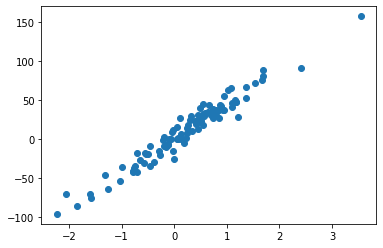

In [4]:
plt.scatter(X, y)

### Modelo

Este es un modelo lineal de la forma:

$$y = w_0 + \sum_i w_i x_i$$

In [5]:
from sklearn.linear_model import SGDRegressor


sgdRegressor = SGDRegressor(
    loss='squared_loss',         # 'squared_loss', 'huber', 'epsilon_insensitive', 'squared_epsilon_insensitive'
    penalty='l2',                # 'none', 'l2' (ridge), 'l1' (lasso), 'elasticnet'
    alpha=0.0001,                # factor regularización
    l1_ratio=0.15,               # ElasticNet
    fit_intercept=True,          # 
    max_iter=1000,               #
    tol=0.001,                   # 
    shuffle=True,                # ?mezcla los datos de entrenamiento
    verbose=0,                   # 
    epsilon=0.1,                 # epsilon-insensitive loss function
    random_state=None,           # Semilla del generador de aleatorios
    learning_rate='invscaling',  # 'constant', 'optimal', 'invscaling', 'adaptive'
    eta0=0.01,                   # leaning_rate = constant
    power_t=0.25,                # inverse scaling learning rate
    early_stopping=False,        # 
    validation_fraction=0.1,     # se usa unicamente en early_stopping=True
    n_iter_no_change=5,          # 
    warm_start=False,            # usa los parámetros actuales o inicia con valores aleatorios
    average=False,               # average weights
)

**Nota 1.---** Si se usa `early_stopping=True`, se usa aprendizaje batch y luego se evalua la generalización. En caso contrario, se usa aprendizaje online.

**Nota 2.---** Las funciones de pérdida son las siguientes:

*  `squared_loss`: $$L(d, y) = (d - y)^2$$  

* `huber`: 
  $$
  L(d, y)=
    \begin{cases}
        \frac{1}{2}[d - y]^2 & \text{Si } |d-y| \le \epsilon \\
        \\
        \epsilon |d-y|-\frac{1}{2}\epsilon^2 & \text{en cualquier otro caso}
        \end{cases}
  $$ 

* `epsilon_insensitive`: 
  $$L(d, y)=
    \begin{cases}
        0 & \text{Si } |d-y| \le \epsilon \\
        \\
        \epsilon |d-y| - \epsilon & \text{en cualquier otro caso}
    \end{cases}
  $$ 

* `squared_epsilon_insensitive`: 
  $$
  L(d, y)= [\text{epsilon_insensitive}(d, y)]^2
  $$ 
  

**Nota 3.---** Las funciones de penalización son las siguientes:

* `none`.

* `l2`: ridge.

* `l1`: LASSO.

* `elastincnet`.


A continuación se ejemplifica el uso de `SGDRegressor` para realizar una regressión lineal.

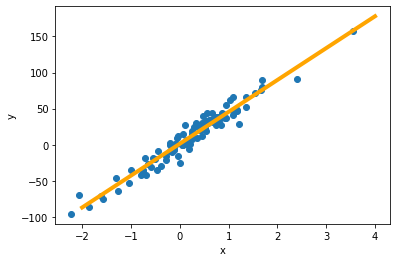

In [6]:
import numpy as np


#
# Entrenamiento del modelo
#
sgdRegressor.fit(X, y)

# 
# Grafico de la muestra para entrenamiento
#
plt.scatter(X, y)

#
# Gráfico del pronóstico usando SGDRegressor
#
X_pred = np.linspace(start=-2, stop=4, num=50)
X_pred = [[x] for x in X_pred]
y_pred = sgdRegressor.predict(X_pred)
plt.plot(X_pred, y_pred, '-', linewidth = 4, color='orange')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [7]:
sgdRegressor.coef_

array([44.16533804])

In [8]:
sgdRegressor.intercept_

array([1.29536839])

## SGDClassifier

Este es un modelo lineal de la forma:

$$y = g(w_0 + \sum_i w_i x_i)$$

donde: 

$$
g(u) = 
\begin{cases}
+1, & \text{Si } u > 0 \\ \\
-1 & \text{De lo contrario.}
\end{cases}
$$

donde $+1$ representa una clase y $-1$ representa la otra clase.

### Preparación de un conjunto de datos artificiales

Text(0, 0.5, '$x_2$')

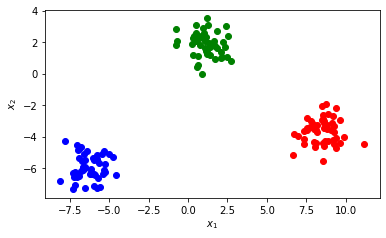

In [9]:
from sklearn.datasets import make_blobs

NPOINTS = 150

X, d = make_blobs(
    n_samples=NPOINTS,
    n_features=2,
    centers=3,
    cluster_std=0.8,
    shuffle=False,
    random_state=12345,
)

plt.scatter(X[:50, 0], X[:50, 1], color="red")
plt.scatter(X[50:100, 0], X[50:100, 1], color="blue")
plt.scatter(X[100:, 0], X[100:, 1], color="green")
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')

### Modelo

In [10]:
from sklearn.linear_model import SGDClassifier


sgdClassifier = SGDClassifier(
    loss='hinge',                # 'hinge', 'log', 'modified_huber', 'squared_hinge', 
                                 # 'perceptron', 'squared_loss', 'huber', 'epsilon_insensitive', 
                                 # 'squared_epsilon_insensitive'
    penalty='l2',                # 'none', 'l2', 'l1', or 'elasticnet'
    alpha=0.0001,                # regularization
    l1_ratio=0.15,               # Elastic Net
    fit_intercept=True,          #
    max_iter=1000,               #
    tol=0.001,                   #
    shuffle=True,                # ?shuffle training data after each epoch
    verbose=0,                   #
    epsilon=0.1,                 # epsilon insensitive loss function
    random_state=None,           #
    learning_rate='optimal',     # 'constant', 'optimal', 'invscaling', 'adaptive'
    eta0=0.0,                    #
    power_t=0.5,                 # eta = eta0 / pow(t, power_t) para 'invscaling'
    early_stopping=False,        # 
    validation_fraction=0.1,     # para early_stopping
    n_iter_no_change=5,          #
    class_weight=None,           # 
    warm_start=False,            # ?reusa solución previa
    average=False,               # 
)

**Nota 1.---** Si se usa `early_stopping=True`, se usa aprendizaje batch y luego se evalua la generalización. En caso contrario, se usa aprendizaje online.


**Nota 2.---** Permite usar diferentes funciones de pérdida:

* `hinge`: 

$$L(d,y)=\max (0, 1 - d \times y)$$

* `log`: logistica

    $$L(d, y) = -d \log (y) - (1-d) \log(1 - y)$$

* `modified_huber`: 

    $$L(d, y)=
    \begin{cases}
    \max(0, 1 - d \times y) & \text{Si } d \times y \ge -1 \\
    \\
    -4 \times d \times y & \text{en cualquier otro caso}
    \end{cases}
    $$ 

* `squared hinge`: 

$$L(d,y)=[\max (0, 1 - d \times y)]^2$$ 

* `perceptron`: 

$$L(d, y)= d - y$$ 

* Cualquiera de las funciones usadas con `SGDRegressor`.
  

**Nota 3.---** Las funciones de penalización son las siguientes:

* `none`.

* `l2`: ridge.

* `l1`: LASSO.

* `elastincnet`.  


A continuación se ejemplifica el uso de `SGDClassifier` para construir un classificador lineal.

In [11]:
#
# Estimación de los parámetros óptimos
#
sgdClassifier.fit(X, d)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [12]:
sgdClassifier.coef_

array([[ 25.89353085, -12.89045379],
       [-41.10862528,  -9.86167078],
       [  2.52962686,  40.80706367]])

In [13]:
sgdClassifier.intercept_

array([-99.94491683, -38.5897078 ,   5.08159692])

In [14]:
sgdClassifier.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Para graficar las fronteras de decisión, se tiene en cuenta que la frontera entre dos clases se produce en $g(0)$, de tal forma que:

$$
w_0 + w_1x_1 + w_2x_2 = 0
$$

Despejando:
$$
    x_2 = - \left(  
    \frac{w_0}{w_2} + \frac{w_1}{w_2} x_1
    \right)
$$



Text(0, 0.5, '$x_2')

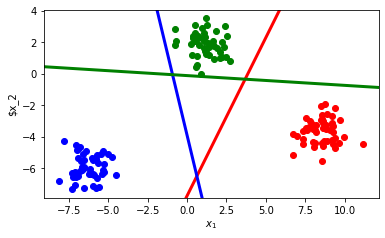

In [15]:
#
# Gráfica de las fronteras de decisión
#

plt.scatter(X[:50,0], X[:50,1], color='red')
plt.scatter(X[50:100,0], X[50:100,1], color='blue')
plt.scatter(X[100:,0], X[100:,1], color='green')
plt.gca().set_aspect('equal', adjustable='box')

xlim = plt.gca().get_xlim()
ylim = plt.gca().get_ylim()

xplot = np.linspace(start=xlim[0], stop=xlim[1], num=20)
fronteraA = (- sgdClassifier.intercept_[0] / sgdClassifier.coef_[0][1] 
             - sgdClassifier.coef_[0][0] / sgdClassifier.coef_[0][1] * xplot)

fronteraB = (- sgdClassifier.intercept_[1] / sgdClassifier.coef_[1][1] 
             - sgdClassifier.coef_[1][0] / sgdClassifier.coef_[1][1] * xplot)

fronteraC = (- sgdClassifier.intercept_[2] / sgdClassifier.coef_[2][1] 
             - sgdClassifier.coef_[2][0] / sgdClassifier.coef_[2][1] * xplot)

plt.plot(xplot, fronteraA, color='red', linewidth=3)
plt.plot(xplot, fronteraB, color='blue', linewidth=3)
plt.plot(xplot, fronteraC, color='green', linewidth=3);

plt.xlim(xlim)
plt.ylim(ylim)
plt.gca().set_aspect("equal", adjustable="box")
plt.xlabel('$x_1$')
plt.ylabel('$x_2')

**Ejercicio.---** ¿Cómo se modifican las fronteras de decisión cuando se usa la función de pérdida de la regresión logística?